In [91]:
%load_ext autoreload
%autoreload 1
from orangecontrib.bio.ontology import OBOOntology, OBOObject
%matplotlib inline
from pylab import * 
from itertools import repeat
%aimport network_tools
from network_tools import * 
import pandas as pd
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [206]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username="grst", api_key="afku7pa4yy")
from plotly.tools import FigureFactory as FF

In [213]:
from scipy.cluster.hierarchy import *
from collections import Counter
from pprint import pprint
sns.set_style("ticks")
sns.set_context("paper")

## Clustering
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [70]:
obo_corr = OBOOntology()
obo_corr.load(open("data/ff-phase2-140729.corr.3.obo"))
col_vars = pd.read_csv("data/column_vars.processed.csv", index_col=0)

In [82]:
lib_to_obo = {
    lib_id: obo_id for (lib_id, obo_id) in zip(col_vars.lib_id, col_vars.obo_id)
}

In [84]:
corr_mat_primary_df = pd.read_csv("data/corr_mat.primary.tsv", sep=" ")
corr_mat_primary_df.rename(index=lib_to_obo, columns=lib_to_obo, inplace=True)
corr_mat_primary_df.head()

,FF:11376-118A8,FF:11327-117E4,FF:11473-119C6,FF:11474-119C7,FF:11475-119C8,FF:11476-119C9,FF:11259-116F8,FF:11336-117F4,FF:11408-118E4,FF:11510-119G7,...,FF:12141-128E8,FF:12132-128D8,FF:12136-128E3,FF:12140-128E7,FF:11771-123I7,FF:11772-123I8,FF:11773-123I9,FF:11763-123H8,FF:11765-123I1,FF:11768-123I4
FF:11376-118A8,1.000000,0.852294,0.898796,0.834619,0.665648,0.707732,0.770054,0.674775,0.525689,0.575146,...,0.051894,0.097564,0.094104,0.102269,0.520991,0.541366,0.372453,0.642398,0.496152,0.716648
FF:11327-117E4,0.852294,1.000000,0.695457,0.647790,0.448250,0.526540,0.855620,0.705615,0.724708,0.500451,...,0.048514,0.124701,0.109222,0.106214,0.513474,0.586029,0.383252,0.878788,0.524409,0.762571
FF:11473-119C6,0.898796,0.695457,1.000000,0.936764,0.887372,0.879332,0.677608,0.540580,0.419975,0.448472,...,0.039429,0.072207,0.073500,0.080137,0.467137,0.471118,0.343991,0.490944,0.423135,0.623003
FF:11474-119C7,0.834619,0.647790,0.936764,1.000000,0.937402,0.958198,0.662604,0.459512,0.390751,0.387469,...,0.041703,0.074442,0.075112,0.087224,0.344295,0.372815,0.251354,0.456186,0.377145,0.540297
FF:11475-119C8,0.665648,0.448250,0.887372,0.937402,1.000000,0.952467,0.513557,0.307391,0.289597,0.231409,...,0.026376,0.047357,0.053367,0.065348,0.245262,0.266839,0.189889,0.287749,0.276737,0.404301


In [85]:
corr_mat_primary = corr_mat_primary_df.as_matrix()

In [181]:
def common_super_terms(obo_ids): 
    cntr = Counter()
    for obo_id in obo_ids: 
        for term in obo_corr.super_terms(obo_id): 
            if not delim_df.loc[term.id, 'include']: 
                cntr[tag2name(obo_corr, term.id)] += 1
    return cntr

In [183]:
def get_ratio(cntr, length): 
    for item, count in cntr.most_common(): 
        yield (item, count/length)

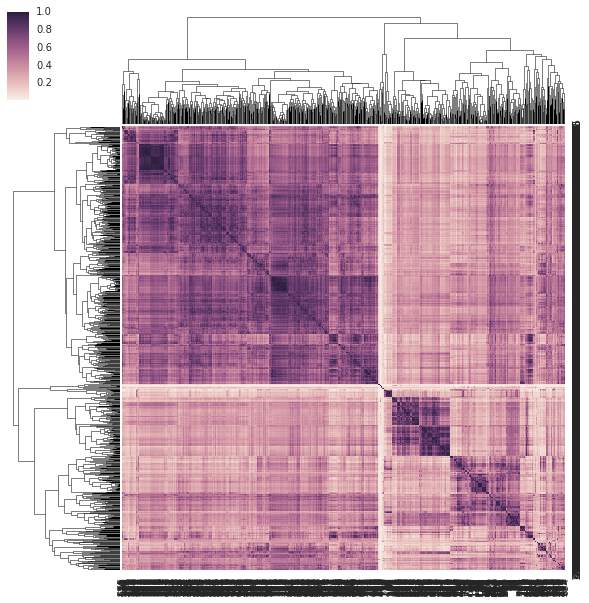

In [22]:
sns.clustermap(corr_mat_primary)

In [222]:
link_mat = linkage(corr_mat_primary, "average")

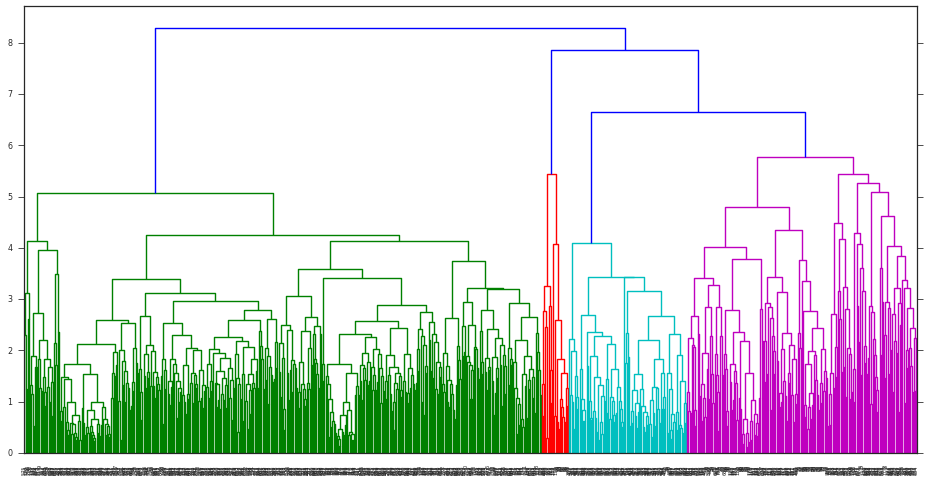

In [223]:
fig, ax = subplots(figsize=(16, 8))
dend = dendrogram(link_mat, ax=ax)

In [205]:
dend['dcoord']

[[0.0, 1.2426752170273905, 1.2426752170273905, 0.0],
 [0.0, 2.3012009424001976, 2.3012009424001976, 1.2426752170273905],
 [0.0, 2.6047876357374662, 2.6047876357374662, 0.0],
 [2.3012009424001976,
  3.1187754140660537,
  3.1187754140660537,
  2.6047876357374662],
 [0.0, 0.5257325240929922, 0.5257325240929922, 0.0],
 [0.0, 1.150372375285706, 1.150372375285706, 0.5257325240929922],
 [0.0, 1.3289476314556758, 1.3289476314556758, 1.150372375285706],
 [0.0, 1.6501663277452012, 1.6501663277452012, 0.0],
 [0.0, 1.682208265159479, 1.682208265159479, 1.6501663277452012],
 [1.3289476314556758,
  1.8946814698623629,
  1.8946814698623629,
  1.682208265159479],
 [0.0, 1.2078542393364491, 1.2078542393364491, 0.0],
 [0.0, 1.2609211947757926, 1.2609211947757926, 1.2078542393364491],
 [0.0, 1.8249991034272053, 1.8249991034272053, 1.2609211947757926],
 [0.0, 0.91446513492139991, 0.91446513492139991, 0.0],
 [0.0, 1.195961949644005, 1.195961949644005, 0.91446513492139991],
 [0.0, 1.4712797394052195, 1.4712

In [77]:
clust4 = fcluster(link_mat, 4, criterion="maxclust")

In [185]:
clust4_1 = corr_mat_primary_df.index[clust4 == 1]
clust4_4 = corr_mat_primary_df.index[clust4 == 4]

In [200]:
cnt4_1 = common_super_terms(clust4_1)
cnt4_4 = common_super_terms(clust4_4)

In [201]:
pprint ([(name, ratio) for (name, ratio) in get_ratio(cnt4_1, len(clust4_1))][:20])
pprint ([(name, ratio) for (name, ratio) in get_ratio(cnt4_4, len(clust4_4))][:20])

[('CL:0002321: embryonic cell', 0.5154867256637168),
 ('UBERON:0004111: anatomical conduit', 0.4668141592920354),
 ('UBERON:0000119: cell layer', 0.44026548672566373),
 ('UBERON:0000483: epithelium', 0.4336283185840708),
 ('CL:0000134: mesenchymal cell', 0.42035398230088494),
 ('UBERON:0004120: mesoderm-derived structure', 0.37610619469026546),
 ('UBERON:0001048: primordium', 0.3672566371681416),
 ('CL:0000222: mesodermal cell', 0.36504424778761063),
 ('UBERON:0003104: mesenchyme', 0.3606194690265487),
 ('CL:0000066: epithelial cell', 0.35176991150442477),
 ('UBERON:0000064: organ part', 0.334070796460177),
 ('UBERON:0000490: unilaminar epithelium', 0.33185840707964603),
 ('UBERON:0011676: subdivision of organism along main body axis',
  0.3274336283185841),
 ('UBERON:0013702: body proper', 0.3274336283185841),
 ('UBERON:0013701: main body axis', 0.3274336283185841),
 ('UBERON:0000475: organism subdivision', 0.3274336283185841),
 ('UBERON:0004535: cardiovascular system', 0.294247787610

## dend to tree

In [226]:
root = to_tree(link_mat)

In [225]:
def build_parent_dict(node, parent_dict, parent_node=None):
    parent_dict[node.id] = parent_node
    if not node.is_leaf():
        build_parent_dict(node.get_left(), parent_dict, node)
        build_parent_dict(node.get_right(), parent_dict, node)
    return parent_dict

In [230]:
parent_dict = {}
parent_dict = build_parent_dict(root, parent_dict)

## Make delimiter nodes
remove all nodes that are non-informative

In [117]:
cntr = Counter()
for obo_id in corr_mat_primary_df.index: 
    for term in obo_corr.super_terms(obo_id): 
        cntr[term.id] += 1
        
delim_df = pd.DataFrame([{
        "obo_id": obo_id,
        "name": obo_corr.term(obo_id).name,
        "count": count,
        "include": 1 if count == len(corr_mat_primary_df) else 0
    } for obo_id, count in cntr.most_common()])

    

In [118]:
delim_df.head()

,count,include,name,obo_id
0,780,1,object,BFO:0000030
1,780,1,Bilateria,NCBITaxon:33213
2,780,1,sample,FF:0000001
3,780,1,Haplorrhini,NCBITaxon:376913
4,780,1,Eutheria,NCBITaxon:9347


In [119]:
# delim_df.to_csv("data/delimiter_nodes.csv", sep='\t')

In [174]:
delim_df = pd.read_csv("data/delimiter_nodes.csv", sep='\t', index_col=0)
delim_df.set_index("obo_id", inplace=True)
delim_df.head()

,count,include,name
obo_id,,,
BFO:0000030,780,1,object
NCBITaxon:33213,780,1,Bilateria
FF:0000001,780,1,sample
NCBITaxon:376913,780,1,Haplorrhini
NCBITaxon:9347,780,1,Eutheria


In [175]:
delim_df.loc[delim_df.name.str.contains("(\d+) days sample$"), 'include'] = 1

/apps64/EasyBuild-Apps/software/Anaconda3/2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [176]:
delim_df.loc[delim_df.name.str.contains("(\d+) minutes sample$"), "include"] = 1

/apps64/EasyBuild-Apps/software/Anaconda3/2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [177]:
delim_df.loc[delim_df.name.str.contains("(\d+) hr"), "include"] = 1

/apps64/EasyBuild-Apps/software/Anaconda3/2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [178]:
delim_df.to_csv("data/delimiter_nodes.2.csv", sep='\t')